# Hand-Written Digit Recognition using **Self Organizing Map Network**

In [1]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=0730435a76c7073c8be40599f1f670650c174bbaa638db8f3f7014c98c874a6e
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom


In [21]:
%matplotlib inline

from time import time
import numpy as np
from minisom import MiniSom
from pylab import text, show, cm, axis, figure, subplot, imshow, zeros
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = X_train
y = y_train

print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)


In [4]:
xsize = 16
ysize = 10
epochs = 2

t0 = time()
som = MiniSom(xsize, ysize, 28*28 ,sigma = .5, learning_rate = 0.2)
som.train_random(X.reshape(-1,28*28), X.shape[0]*epochs)
print('Time elapsed: %.2fs' % (time()-t0))

Time elapsed: 122.53s


In [5]:
t0 = time()
wmap = {}
qerrors = np.empty((xsize,ysize))
qerrors.fill(np.nan)
for im,x in enumerate(X.reshape(-1,28*28)):
    (i,j) = som.winner(x)
    qe = np.linalg.norm(x-som._weights[i,j])
    if np.isnan(qerrors[i,j]) or qe<qerrors[i,j]:
        wmap[(i,j)] = im
        qerrors[i,j] = qe
print('Time elapsed: %.2fs' % (time()-t0))

Time elapsed: 28.77s


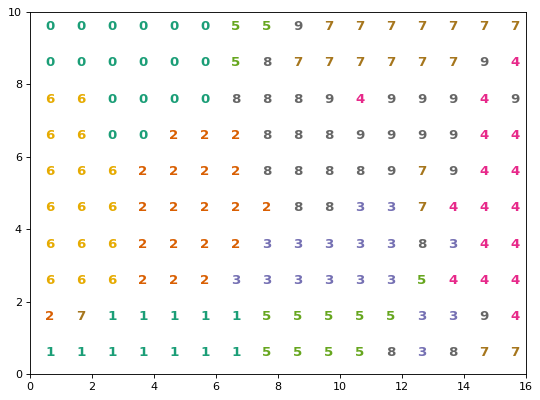

In [23]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for j in range(ysize):
	for i in range(xsize):
		if (i,j) in wmap:
			text(i+0.5, j+0.5, str(y[wmap[(i,j)]]), color=cm.Dark2(y[wmap[(i,j)]]/9.), fontdict={'weight': 'bold', 'size': 12})
ax = axis([0, som._weights.shape[0], 0, som._weights.shape[1]])

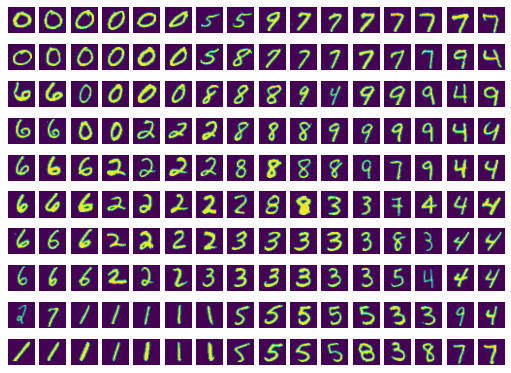

In [25]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
cnt = 0
for j in reversed(range(ysize)):
	for i in range(xsize):
		subplot(ysize, xsize, cnt+1, frameon=False, xticks=[], yticks=[])
		if (i,j) in wmap:
			imshow(X[wmap[(i,j)]])
		else:
			imshow(zeros((28,28)))
		cnt = cnt + 1

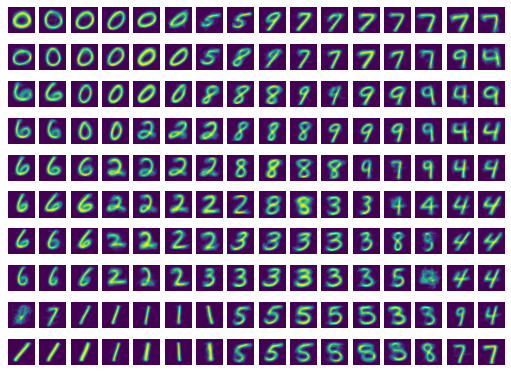

In [26]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
cnt = 0
for j in reversed(range(ysize)):
	for i in range(xsize):
		subplot(ysize, xsize, cnt+1, frameon=False, xticks=[], yticks=[])
		imshow(som._weights[i,j].reshape(28,28))
		cnt = cnt + 1

In [29]:
count = 0
predicted_classes = []
for im, x_test in enumerate(X_test.reshape(-1, 28*28)):
  (i, j) = som.winner(x_test)
  predicted_classes.append(y[wmap[(i,j)]])
  if y[wmap[(i,j)]]==y_test[im]:
    count = count+1

In [30]:
print("Count of Correctly Classified Images out of 10,000 test_images = ", count)
print("Accuracy = ", count/10000)
print("Error: ", 1-count/10000)

Count of Correctly Classified Images out of 10,000 test_images =  8910
Accuracy =  0.891
Error:  0.10899999999999999


In [31]:
from keras.preprocessing import image

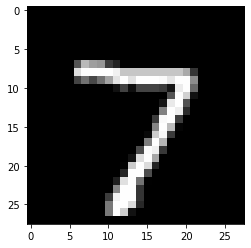

In [12]:
plt.imshow(image.array_to_img(X_test.reshape(10000, 28, 28, 1)[0]), cmap = "gray")

In [32]:
(i, j) = som.winner(X_test.reshape(-1, 28*28)[0])
num_class = y[wmap[(i,j)]]
print(num_class)

7


In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_classes, labels=[i for i in range(10)])
print(cm)

[[ 945    1    2    4    5    4   17    1    1    0]
 [   0 1123    7    2    0    0    2    0    0    1]
 [  14    7  935    9   24    0    5   18   20    0]
 [   3    0   17  892    3   41    0   12   36    6]
 [   2    9    8    4  751    0   12   67    2  127]
 [   9    1    9   79    5  740   12    5   23    9]
 [   6    3    5    0   15    2  925    0    0    2]
 [   0   23   19    4   13    0    0  932    1   36]
 [  11    2   23   52    6   36    5   10  821    8]
 [   4   10    8   17   72    5    1   42    4  846]]


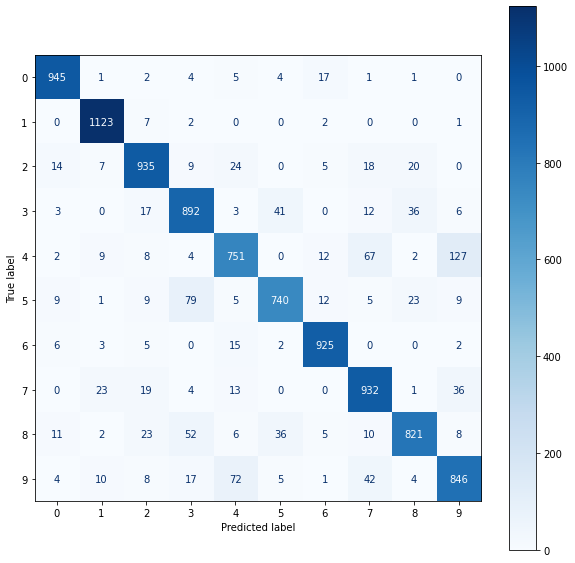

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [i for i in range(10)])
disp = disp.plot(cmap = plt.cm.Blues, ax = ax, values_format = 'd')
plt.show()

In [53]:
print('Accuracy = ', accuracy_score(y_test, predicted_classes))
print('Error = ', 1-accuracy_score(y_test, predicted_classes))

Accuracy =  0.891
Error =  0.10899999999999999


In [54]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.91      0.91      0.91      1032
           3       0.84      0.88      0.86      1010
           4       0.84      0.76      0.80       982
           5       0.89      0.83      0.86       892
           6       0.94      0.97      0.96       958
           7       0.86      0.91      0.88      1028
           8       0.90      0.84      0.87       974
           9       0.82      0.84      0.83      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Hand-Written Digit Recognition using **Convolutional Neural Network**

In [55]:
import keras
from keras.datasets import mnist
data = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

In [56]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float')/255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float')/255

In [57]:
from keras.utils import to_categorical
train_labels_original = train_labels
train_labels = to_categorical(train_labels)
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [58]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=2, batch_size=64)

Epoch 1/2
938/938 [==============================] - 47s 50ms/step - loss: 0.1751 - accuracy: 0.9455
Epoch 2/2
938/938 [==============================] - 48s 51ms/step - loss: 0.0482 - accuracy: 0.9844


In [60]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Accuracy = ", test_accuracy)
print("Error: ", 1-test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.0376 - accuracy: 0.9880
Accuracy =  0.9879999756813049
Error:  0.012000024318695068


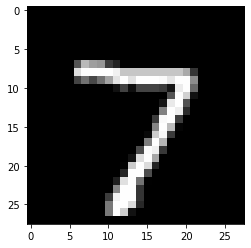

In [61]:
predictions = model.predict(test_images)
plt.imshow(image.array_to_img(test_images[0]), cmap="gray")

In [62]:
predicted_classes = np.argmax(predictions, axis = 1)
predicted_classes[0]

7

In [63]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_classes, labels=[i for i in range(10)])
print(cm)

[[ 975    0    3    0    0    0    0    1    1    0]
 [   0 1131    1    2    0    0    1    0    0    0]
 [   0    0 1031    0    0    0    0    1    0    0]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    2    0  974    0    0    0    1    5]
 [   0    0    0    6    0  881    1    1    1    2]
 [  10    2    0    0    7    7  929    0    3    0]
 [   0    2   18    2    0    0    0 1004    1    1]
 [   1    0    4    2    0    1    0    2  962    2]
 [   2    1    1    2    3    3    0    4    5  988]]


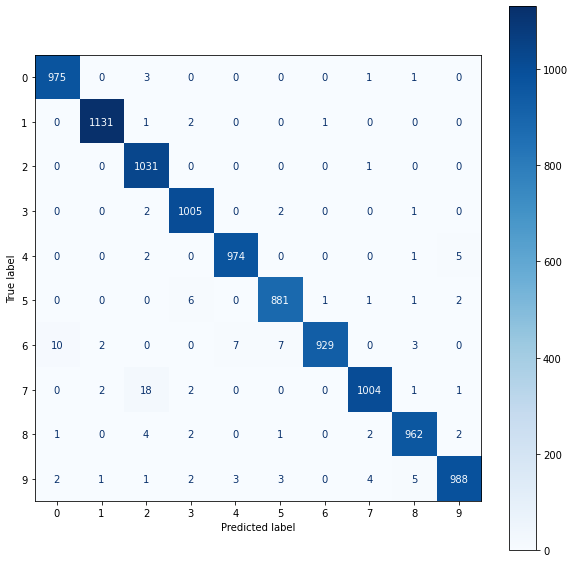

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [i for i in range(10)])
disp = disp.plot(cmap = plt.cm.Blues, ax = ax, values_format = 'd')
plt.show()

In [65]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.97      1.00      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

